<a href="https://colab.research.google.com/github/eldercamposds/precoXhora_MachineLearning/blob/main/Pre%C3%A7o_Por_Hora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No link abaixo temos um conjunto de dados representando a relação entre horas estimadas para a realização de determinada atividade x preço pago por esta atividade.



In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()


,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
# traduzindo os nomes das colunas
a_renomear = {
    'expected_hours' : 'horas esperadas',
    'price': 'preço',
    'unfinished': 'não finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,não finalizado,horas esperadas,preço
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


a coluna 'nao_finalizado' pode gerar confusões, afinal 0 seriam os projetos finalizados e 1 os não finalizados. Podemos organizar as nossas features com mais clareza de forma a evitar erros no desenvolvimento do projeto.

In [3]:
# criando a coluna 'finalizados'
troca = {
    0 : 1,
    1 : 0
} # criando nova colunas com os valores invertidos para não gerar confusão
dados['finalizado'] = dados['não finalizado'].map(troca)
dados.head()

,não finalizado,horas esperadas,preço,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [4]:
dados.tail()#ultimos elementos

,não finalizado,horas esperadas,preço,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


O que queremos agora é visualizar as informações de outra forma. Neste caso, temos duas features (horas_esperadas e preco) e a classificação (finalizado). Não usaremos a coluna nao_finalizado.

Com essas duas features, podemos desenhar em um eixo as horas_esperadas e em outro o preco. Para isso, usaremos uma famosa biblioteca do Python chamada Seaborn. Vamos importá-la como sns (que é a importação padrão), e plotaremos os pontos distribuídos por meio do scatterplot()

Para este método, precisamos passar o parâmetro referente às coluna x (horas_esperadas) e y (preco). Por fim, devemos passar os dados, de onde vem nosso dataframe do Pandas.

<Axes: xlabel='horas esperadas', ylabel='preço'>

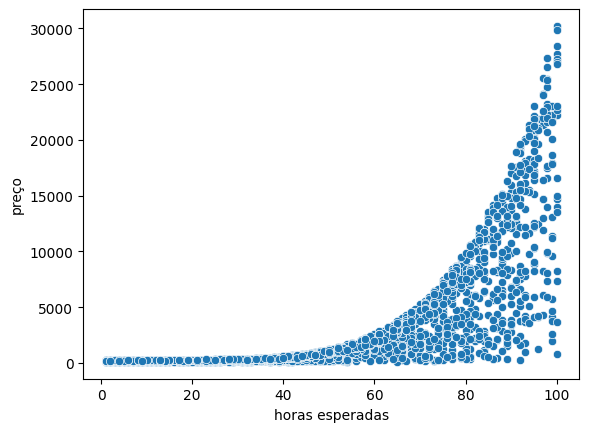

In [5]:
import seaborn as sns

sns.scatterplot(x = "horas esperadas", y = 'preço', data = dados)

Existem várias maneiras de tentarmos visualizar as duas classes (0 ou 1 para finalizado) no gráfico. Uma delas é por meio de cores. Utilizaremos a mesma estrutura do método scatterplot, mas dessa vez passando o parâmetro hue, que será baseado na coluna finalizado, pintando os pontos de acordo com a classe atribuída à essa coluna:

<Axes: xlabel='horas esperadas', ylabel='preço'>

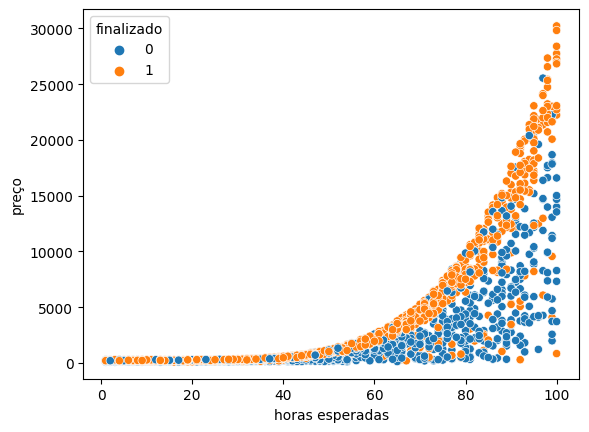

In [6]:
sns.scatterplot(x = "horas esperadas", y = 'preço', hue='finalizado', data = dados)

Perceba que a medida em que horas_esperadas aumenta, os agrupamentos de projetos finalizados se deslocam para faixas maiores de preco.

Uma outra alternativa é realizar uma plotagem relativa por meio de relplot(). Com esse método, ao invés das cores, queremos plotar os dados em colunas (col) diferentes, uma para os projetos finalizados e outra para os não-finalizados:

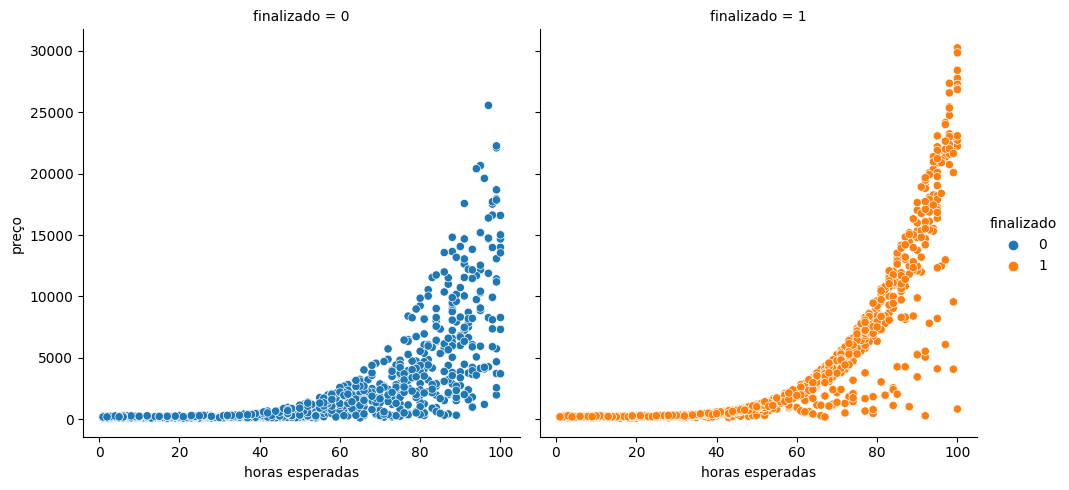

In [7]:
sns.relplot(x = "horas esperadas", y = 'preço', hue = 'finalizado', col = 'finalizado', data = dados)

Nosso próximo passo é realizar a modelagem. Primeiro, coletaremos nossos dados no eixo x, que são as colunas horas_esperadas e preco. Em seguida, o eixo y, referente à coluna finalizado.

In [8]:
x = dados[['horas esperadas', 'preço']]
y = dados['finalizado']

Agora criaremos um modelo, separaremos os dados de treino e teste, treinaremos efetivamente o modelo e por fim verificaremos a taxa de acerto.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state= SEED, test_size = 0.25, stratify = y)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Lembre-se que, quando estamos explorando possibilidades e realizando testes, é normal utilizarmos os notebooks dessa maneira. Porém, quando queremos colocar um projeto em produção, a prática é criar arquivos Python específicos, com os módulos que fazem sentido para aquela situação.

Vamos verificar rapidamente nosso código: estamos realizando o train_test_split() para dividir os dados de teste e de treino, com o tamanho de 0.25 (25%) para o teste; estratificando esses dados de acordo com as classes; criando nosso modelo LinearSVC; treinando esse modelo; prevendo os resultados e testando a acurácia do estimador.

Ao executamos nosso código, teremos o seguinte resultado:

In [10]:
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.00%


A acurácia não parece ser boa, mas essa é a base de um algoritmo para tentar prever resultados. Mas devemos nos perguntar: como saber se é de fato ruim?

Para obtermos uma resposta satisfatória, precisamos de um recurso comparativo. Portanto, inventaremos um algoritmo bem simples que terá como previsão que todos os projetos são finalizados, isto é, os 540 elementos de teste serão 1.

Com o Numpy, a biblioteca que gera matrizes, faremos com que 540 elementos tenham o valor 1. Feito isso, estipularemos que essas são as previsões, as chamaremos de baseline, e testaremos sua acuráci

In [11]:
import numpy as np
baseline = np.ones(540)#cria 540 números 1
acuracia = accuracy_score(teste_y, baseline)
print(f'A acurácia da baseline foi de {acuracia*100:.2f}%')

A acurácia da baseline foi de 52.59%


Baseline, e é o parâmetro que devemos superar quando construímos estimadores. Devemos ser muito melhores que as porcentagens apresentadas na baseline, e por isso é muito importante que ele exista ainda que teste sempre a mesma classe.

#Analizando as classificações

Agora iremos analisar cada uma das classificações que realizamos. Para isso, copiaremos o mesmo código de scatterplot() que utilizamos anteriormente, mas, ao invés de dados, usaremos teste_x. Também precisaremos alterar o campo que serve de parâmetro para hue - no caso, teste_y.

<Axes: xlabel='horas esperadas', ylabel='preço'>

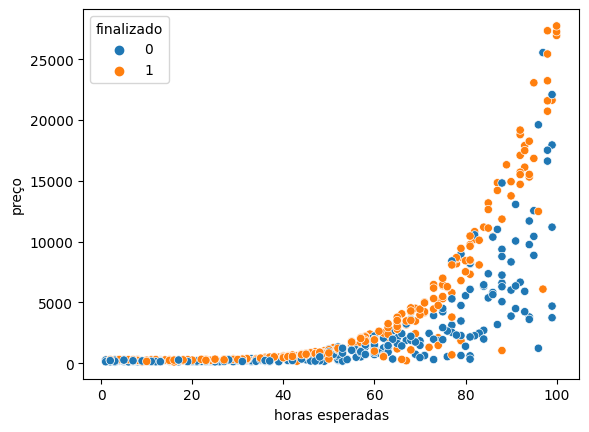

In [12]:
sns.scatterplot(x = "horas esperadas", y = 'preço', hue = teste_y, data = teste_x)#comparando teste x e teste y

Repare que, aparentemente, estamos seguindo o mesmo padrão de treino e teste. Então o que há de errado com o nosso teste?

Quando estamos trabalhando com duas dimensões (e somente nesses casos), podemos colorir todos os pixels do gráfico de acordo com as possíveis previsões do classificador que criamos. Por exemplo, será ou não vendido um projeto na faixa de valor 25000 com tempo de construção de 60h?

O algoritmo deve ser capaz de aprender a curva ascendente que vemos no gráfico: quanto mais bem pago e com maior tempo de elaboração, maior chance do projeto ser de fato concluído.

Existem diversas maneiras de realizarmos esse procedimento, mas são maneiras de trabalhar com matrizes e que não necessariamente serão executadas explicitamente no nosso dia-a-dia. Como estamos em um caso bastante específico, iremos abordá-las apenas com duas dimensões, já que nos ajudarão a compreender com clareza qual é o problema do nosso algoritmo.

Do conjunto teste_x, coletaremos o valor mínimo (min()) para horas_esperadas, e atribuiremos o nome x_min a esse valor. Faremos um procedimento similar para x_max, mas dessa vez coletando o valor máximo. Repetiremos essa estrutura para teste_y, mas agora trabalhando com preco mínimo e máximo. Por fim, imprimiremos o resultado.

In [13]:
x_min = teste_x['horas esperadas'].min()
x_max = teste_x['horas esperadas'].max()
y_min = teste_x['preço'].min()
y_max = teste_x['preço'].max()
print(x_min, x_max, y_min, y_max)

1 100 101 27738


O x está indo de 1 a 100, enquanto y varia de 101 a 27738. Agora definiremos quantos pixels haverá em cada dimensão; se multiplicamos 100 x 100, isto é, 100 pixels para cada dimensão (altura e largura), teremos um total de 10.000 pontos, o que é o suficiente.

Entre x_min e x_max, cada espaço terá o tamanho máximo do gráfico dividido pelo total de pixels ((x_max - x_min)/pixels.

Por fim, adicionaremos o método arange() da biblioteca do Numpy.

In [14]:
# definindo a quantidade de pixel 
pixel = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixel) 
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixel)

Agora a ideia é criarmos um grid entre os dois eixos, multiplicando as opções de acordo com as diferentes possibilidade de custo de projeto e tempo de execução. Temos na biblioteca do Numpy o np.meshgrid(), que consegue mesclar um grid . Esse método recebe como parâmetros o eixo_x e eixo_y, e devolve o conteúdo é xx e yy. 

Com o código estruturado desta maneira, o que temos é a repetição do eixo x 100 vezes, e o mesmo ocorre com eixo y. Ou seja, ainda não mesclamos realmente esses dados. Para fazermos isso, usaremos o xx.ravel():

In [15]:
xx, yy = np.meshgrid(eixo_x, eixo_y) #Cria um grido com os valores setados
pontos = np.c_[xx.ravel(), yy.ravel()] #concatenação entre os eixos
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

Agora, nosso trabalho é, a partir do modelo, fazer as previsões (predict() para todos esses pontos. Como resultado, teremos uma série de números, que são as classificações. Chamaremos essas classificações de Z

Precisamos nos atentar para o formato (shape) do array, que é 10000, mas se analisarmos xx, verificaremos que suas dimensões são 100, 100.

Precisamos redimensionar (reshape) o array de 10000 de acordo com xx.



In [16]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)#redimensionando de acordo com o xx

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


#Decision Boundary

Finalmente, poderemos plotar esses dados. Para isso, usaremos a biblioteca Matplotlib, cujas importações costumam ser plt. Novamente, queremos que os pontos sejam espalhados (scatter()), mas não usaremos o scatterplot() do Seaborn pois, nesse caso, queremos um controle mais refinado dessa plotagem.

* O método scatter() deverá receber teste_x.horas_esperadas e teste_x.preco. Em seguida, definiremos a cor por meio do argumentoc= recebendo teste_y.

* Para reduzirmos o tamanho dos pontos e melhorarmos a visualização

* Usaremos plt.contourf() (de countor, ou "contorno"), que receberá xx, yy e Z. Para que a tonalidade não seja muito forte, escreveremos alpha=0.3, aumentando a transparência.

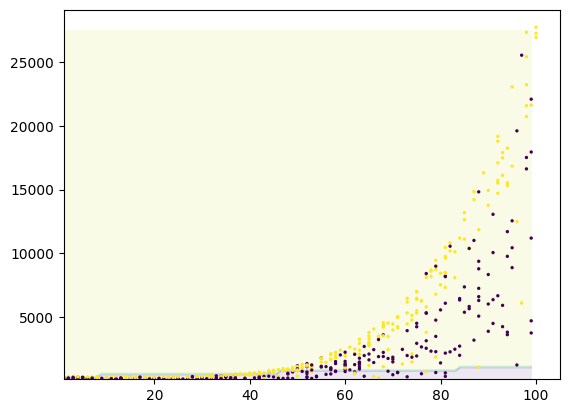

In [17]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha = 0.1)
plt.scatter(teste_x['horas esperadas'], teste_x['preço'], c=teste_y, s=2)#c => color; s => size 



Perceba que a curva de decisão do algoritmo quase não é visível, o que quer dizer que os palpites para a finalização do projeto estão enviesados.

Precisamos de algum modelo estimador que seja capaz de aprender um padrão mais inteligente. O algoritmo que estamos utilizando só é capaz de aprender uma linha reta, que não serve para classificação. 

#Utilizando SVC não linear

Com o algoritmo do estimador LinearSVC, fomos capazes de encontrar uma borda de decisão na forma de linha. Esse estimador, que tentou modelar os nossos dados, é capaz de encontrar relacionamentos lineares entre as informações que passamos, mas nada além disso. Reparando nos nossos dados, percebemos que o relacionamento entre os projetos finalizados ou não parece ser melhor representado por uma curva, e não uma reta.

Tendo isso em vista, precisamos de outro estimador. Se consultarmos a documentação do Sklearn sobre o LinearSVC, que é um dos estimadores possíveis, encontraremos a informação de que existem diversos parâmetros que podem ser passados para ele.

> class sklearn.svm.LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)[source]

Temos, por exemplo, o random_state=None, o que significa que utilizar a aleatoriedade para encontrar a melhor reta representativa para nossos dados. Dessa forma, se executarmos duas vezes nosso código, podemos ter resultados diferentes de acurácia mantendo o mesmo valor de SEED, por exemplo, ora 47.41%, ora 53.0%.

Isso ocorre porque estamos passando o SEED apenas para train_test_split(), e mantendo, sem saber, a aleatoriedade do LinearSVC. Isso significa também que não conseguiremos replicar os resultados.

Uma alternativa é passarmos o random_state=SEED para nosso modelo LinearSVC(). Assim, os resultados se manterão toda vez que rodarmos o algoritmo.

* Para não termos de passar todas as vezes o argumento random_state, aprenderemos um outro recurso do Sklearn. As bibliotecas dessa natureza usam o random_state com o valor None por padrão. Analisando a documentação de muitas dessas bibliotecas, aprenderemos que, quando o valor de random_state é None, o np.random do Numpy é utilizado.

* Portanto, se configurarmos np.random.seed() como SEED, não precisamos mais passa-lo para train_test_split() ou para LinearSVC(), pois estamos utilizando o Numpy de forma fixa.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 20
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

modelo = SVC(gamma = 'auto')# gamma define o quão importe é um único exemplo
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

In [19]:
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 58.89%


Ou seja, um resultado de similar ao que obtivemos usando LinearSVC. O que pode ter acontecido? Vamos descobrir qual tipo de relacionamento foi realizado pelo SVC. Plotaremos novamente, aproveitando a estrutura de código que já utilizamos para formação de pontos e assim por diante:

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


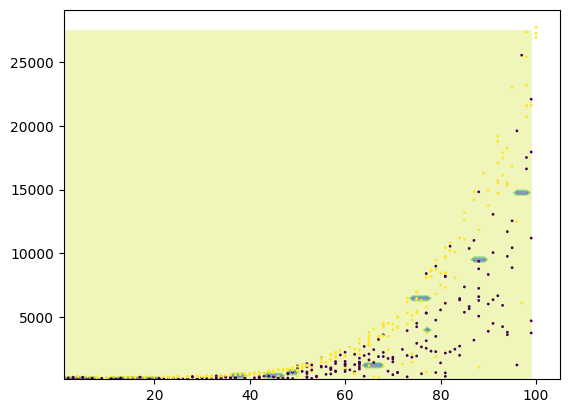

In [20]:
x_min = teste_x['horas esperadas'].min()
x_max = teste_x['horas esperadas'].max()
y_min = teste_x['preço'].min()
y_max = teste_x['preço'].max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x['horas esperadas'], teste_x['preço'], c=teste_y, s=1)

# DECISION BOUNDARY

Analisando a plotagem, percebemos que de fato foram realizados relacionamentos não lineares. Há pequenos agrupamentos de cor diferente que representam as previsões do algoritmo para projetos que terão valor 1, e o restante será 0. Não estamos tendo um palpite muito inteligente.

Isso o ocorre devido a discrepância entre os eixos: em X, teremos valores de 0 a 100, e em Y de 0 a 30000. Esses algoritmos são muito suscetíveis a escala, e darão menos valor para variações menores, como é o caso de X.

#Redefinindo a Escala

Escalas distintas em features causam um desbalanço no algoritmo. Uma alternativa para solucionarmos esse problema é reescalarmos todo o nosso projeto para uma faixa similar. Faremos isso utilizando o escalador padrão do Sklearn, o StandardScaler, que é uma fase de pré-processamento e padronização de valores.

Primeiramente importaremos este recurso (from sklearn.preprocessing import StandardScaler), e então faremos suaves alterações no código que já utilizamos anteriormente.

Queremos elaborar uma nova escala a partir dos valores de X para treino. Para tanto, criaremos um StandardScaler(), que será atribuído à uma variável scaler, e treinaremos esse processo baseado em treino_x. Em seguida, transformaremos treino_x em um novo treino_x que já está na nova escala. Em seguida, repetiremos o processo para teste_x.

Desse modo, todas as features serão utilizadas para treinar o processo de escala, e por fim, atualizadas de acordo com as novas medidas. Já sabemos que não é uma boa prática sobrescrever variáveis, pois podemos nos perder em meio às nomeclaturas. Portanto, renomearemos os dados "crus" (os originais) adicionando o termo raw - ou seja, raw_treino_x e raw_teste_x.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)# os treinos e testes foram renomeados para raw
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)# treinará a escala com base no treino
treino_x = scaler.transform(raw_treino_x)#redefinirá a escala
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


Tivemos uma taxa de acerto ainda melhor que a do LinearSVC(), mas ainda precisamos visualizar isso em um gráfico:

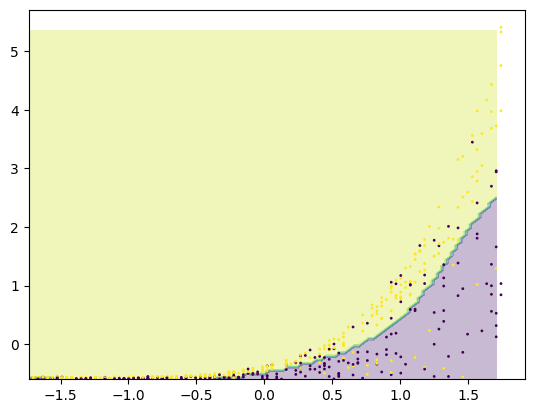

In [22]:
data_x = teste_x[:,0]# os testes e treinos não são mais um DataFrame, por isso é necessário redefini-las
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)


Por mais que LinearSVC tenha tido uma taxa razoável de 64.44%, a linha de decisão na plotagem foi horrível. Na prática, utilizar o SVC parece ser uma decisão melhor: temos uma curva de decisão bem marcada e o estimador possui uma taxa de acerto um pouco maior, de 66.85%.